#### Linear Regression Theory (Random data)

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = 2*np.random.rand(100,1)

In [8]:
y = 4+3*X+np.random.randn(100,1)

#### Normal Equation

In [9]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [10]:
theta_best

array([[4.36085051],
       [2.72387333]])

In [16]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]

In [17]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.36085051],
       [9.80859718]])

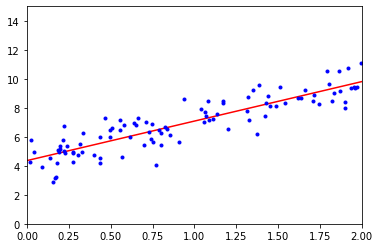

In [19]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Using Scikit Learn

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([4.36085051]), array([[2.72387333]]))

In [22]:
lin_reg.predict(X_new)

array([[4.36085051],
       [9.80859718]])

### Batch Gradient Descent

In [23]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [24]:
theta

array([[4.36085051],
       [2.72387333]])

In [25]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [27]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.31887229]), array([2.68102295]))

### Polynomial Regression

In [48]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

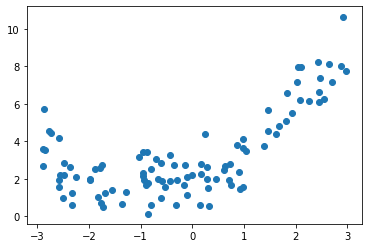

In [50]:
plt.scatter(X, y)
plt.show()

In [51]:
from sklearn.preprocessing import PolynomialFeatures
ploy_feat = PolynomialFeatures(degree=2,include_bias=False)

In [54]:
X_poly = ploy_feat.fit_transform(X)
X[0]

array([-2.49988825])

In [55]:
 X_poly[0]

array([-2.49988825,  6.24944124])

In [57]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.03542918]), array([[0.93017452, 0.4794472 ]]))

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [59]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

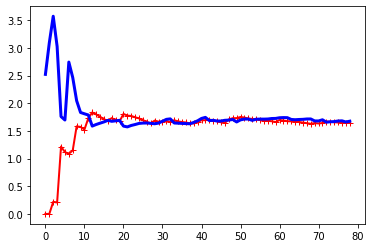

In [60]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)